# T3 - Multi-Individual Challenge Time Series

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

from emodlib.malaria import IntrahostComponent

In [2]:
duration = 350
n_people = 25

asexuals = np.zeros((n_people, duration))
gametocytes = np.zeros((n_people, duration))

pp = [IntrahostComponent.create() for _ in range(n_people)]
_ = [p.challenge() for p in pp]

for t in range(duration):
    for i, p in enumerate(pp):
        p.update(dt=1)
        asexuals[i, t] = p.parasite_density
        gametocytes[i, t] = p.gametocyte_density
            
da = xr.DataArray(dims=('individual', 'time', 'channel'),
                  coords=(range(n_people), range(duration), ['parasite_density', 'gametocyte_density']))
                      
da.loc[dict(channel='parasite_density')] = asexuals
da.loc[dict(channel='gametocyte_density')] = gametocytes

In [3]:
da

<xarray.DataArray (individual: 25, time: 350, channel: 2)>
array([[[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
...
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]]])
Coordinates:
  * individual  (individual) int64 0 1 2 3 4 5 6 7 8 ... 17 18 19 20 21 22 23 24
  * time        (time) int64 0 1 2 3 4 5 6 7 ... 342 343 344 345 346 347 348 349
  * channel     (channel) <U18 'parasite_density' 'gametocyte_density'

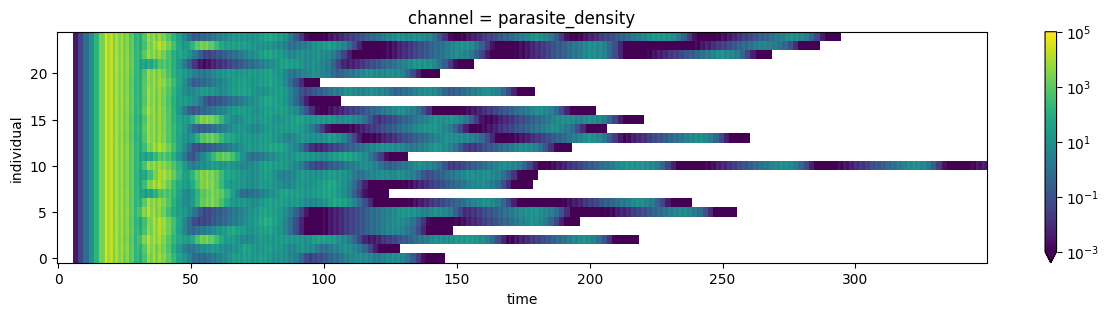

In [4]:
import matplotlib.colors as colors

da.sel(channel='parasite_density').plot(aspect=5, size=3, norm=colors.LogNorm(vmin=0.001, vmax=100000))

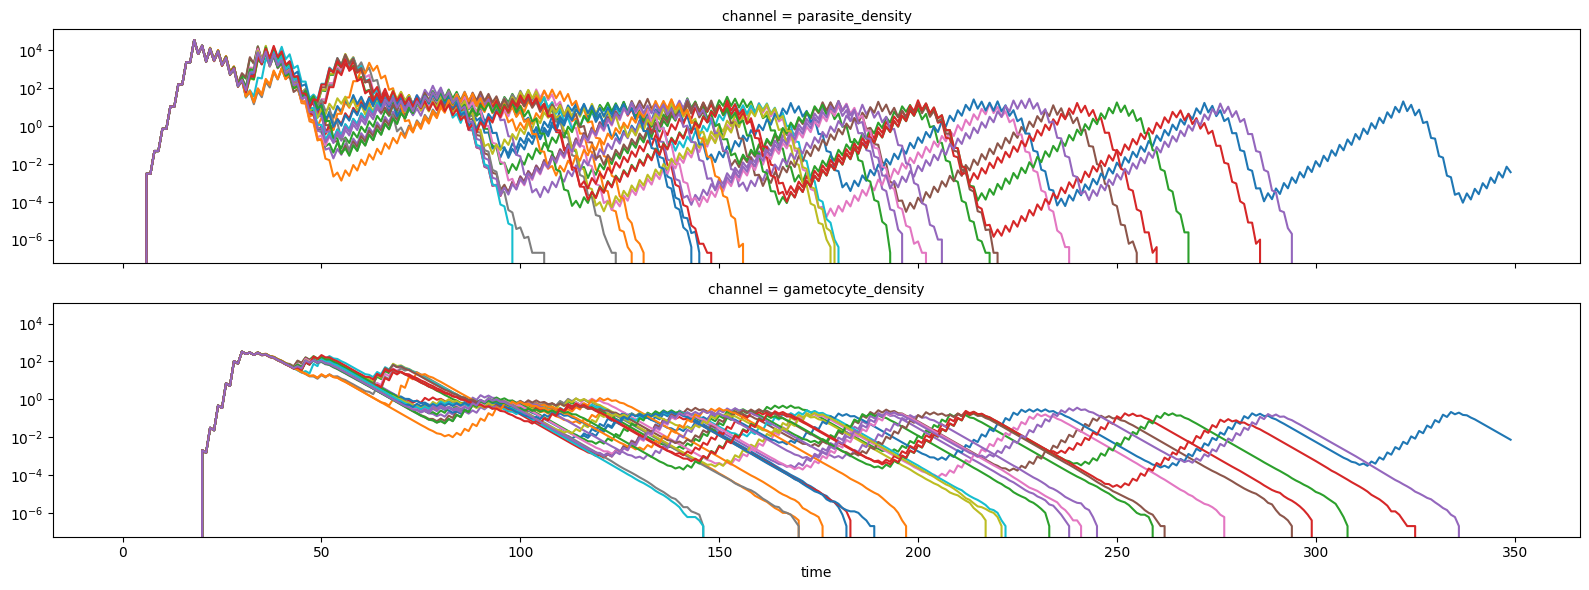

In [5]:
da.plot.line(x='time', row='channel', aspect=5, size=3, add_legend=False, yscale='log')